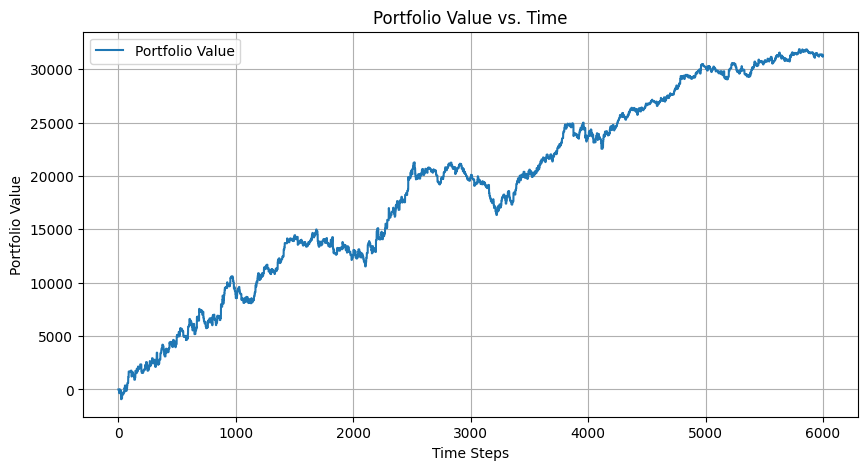

Optimal L: 0.12
Optimal B: 0.22842105263157894
Maximized PnL: 31268.911339740083
Max Drawdown: 4929.241061297213
Hit Ratio: 0.5271195365982095


In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
df = pd.read_csv("assign6.csv")
def compute_pnl(L, B, df):
    position = 0
    entry_price = 0
    pnl = 0

    for i in range(len(df)):
        alpha = df.loc[i, "alpha"]
        price = df.loc[i, "price"]

        if alpha > B and position == 0:
            position = 1
            entry_price = price
        elif alpha < L and position == 1:
            pnl += price - entry_price
            position = 0
        elif alpha < -B and position == 0:
            position = -1
            entry_price = price
        elif alpha > -L and position == -1:
            pnl += entry_price - price
            position = 0
    
    return pnl
L_values = np.linspace(0.01, 1, 10)
B_values = np.linspace(0.02, 2, 20)
best_L, best_B, best_pnl = 0, 0, -np.inf

for L, B in itertools.product(L_values, B_values):
    if L < B:
        pnl = compute_pnl(L, B, df)
        if pnl > best_pnl:
            best_L, best_B, best_pnl = L, B, pnl
def compute_portfolio(df, L, B):
    position = 0
    entry_price = 0
    portfolio_value = [0]
    pnl = 0
    trades = 0
    profitable_trades = 0
    peak = 0
    max_drawdown = 0

    for i in range(len(df)):
        alpha = df.loc[i, "alpha"]
        price = df.loc[i, "price"]

        if alpha > B and position == 0:
            position = 1
            entry_price = price
        elif alpha < L and position == 1:
            trade_pnl = price - entry_price
            pnl += trade_pnl
            position = 0
            trades += 1
            if trade_pnl > 0:
                profitable_trades += 1
        elif alpha < -B and position == 0:
            position = -1
            entry_price = price
        elif alpha > -L and position == -1:
            trade_pnl = entry_price - price
            pnl += trade_pnl
            position = 0
            trades += 1
            if trade_pnl > 0:
                profitable_trades += 1

        portfolio_value.append(pnl)
        peak = max(peak, pnl)
        max_drawdown = max(max_drawdown, peak - pnl)

    hit_ratio = (profitable_trades / trades) if trades > 0 else 0
    return portfolio_value, max_drawdown, hit_ratio

portfolio_values, max_drawdown, hit_ratio = compute_portfolio(df, best_L, best_B)
plt.figure(figsize=(10, 5))
plt.plot(portfolio_values, label="Portfolio Value")
plt.xlabel("Time Steps")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Value vs. Time")
plt.legend()
plt.grid(True)
plt.show()
print(f"Optimal L: {best_L}")
print(f"Optimal B: {best_B}")
print(f"Maximized PnL: {best_pnl}")
print(f"Max Drawdown: {max_drawdown}")
print(f"Hit Ratio: {hit_ratio}")